# Holt Linear Or Double  Exponential Smoothing -- DES

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Time Series Analysis\Exponential Smoothing\practice\us_covid.csv")
data.head()

,date,cases
0,21-01-2020,1
1,22-01-2020,1
2,23-01-2020,1
3,24-01-2020,2
4,25-01-2020,3


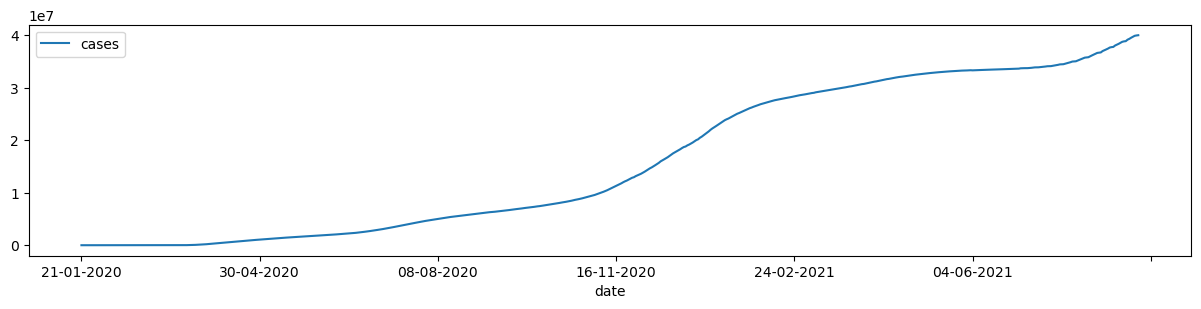

In [4]:
data.plot.line(x = 'date',y = 'cases',figsize=(15,3))
plt.show() # pattern = Trend - upward

In [5]:
data2=data.set_index("date")
data2.head()

,cases
date,
21-01-2020,1
22-01-2020,1
23-01-2020,1
24-01-2020,2
25-01-2020,3


#### Manual Model

* Alpha ( Smoothing) = 0.7 & beta ( Trend ) = 0.5
* Initial ( Smoothing) = 1 ( Y1 ) & Initial ( Trend ) = 0 ( y2 - y1)

In [6]:
model2 = Holt(data2,initial_level=1,initial_trend=0,initialization_method='known').fit(
        smoothing_level=0.7,smoothing_trend=0.5,optimized=False,remove_bias=False,method='ls')
model2.params

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '21-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '22-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '23-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '24-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaco

{'smoothing_level': 0.7,
 'smoothing_trend': 0.5,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 1.0,
 'initial_trend': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [7]:
round(model2.fittedvalues)

date
21-01-2020           1.0
22-01-2020           1.0
23-01-2020           1.0
24-01-2020           1.0
25-01-2020           2.0
                 ...    
01-09-2021    39470779.0
02-09-2021    39699177.0
03-09-2021    39892133.0
04-09-2021    40084984.0
05-09-2021    40145630.0
Length: 594, dtype: float64

In [8]:
df = pd.DataFrame(
    np.c_[data.cases, model2.level, model2.trend, model2.fittedvalues],
    columns=["Actual","Level","Trend","Forecast"])
df.head()

,Actual,Level,Trend,Forecast
0,1.0,1.000,0.0000,1.00
1,1.0,1.000,0.0000,1.00
2,1.0,1.000,0.0000,1.00
3,2.0,1.700,0.3500,1.00
4,3.0,2.715,0.6825,2.05


#### Forecast Value & Plot 

In [9]:
Forecast2 = round(model2.forecast(6),0)
Forecast2

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


594    40145788.0
595    40244201.0
596    40342614.0
597    40441027.0
598    40539441.0
599    40637854.0
dtype: float64

<AxesSubplot:xlabel='date'>

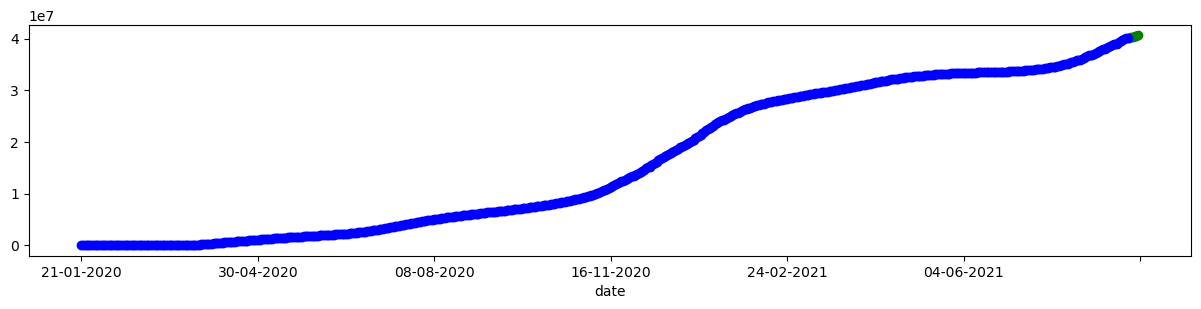

In [10]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [11]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,cases,Forecast
date,,
21-01-2020,1,1.00
22-01-2020,1,1.00
23-01-2020,1,1.00
24-01-2020,2,1.00
25-01-2020,3,2.05


#### Accuracy of Model

In [13]:
mean_absolute_percentage_error = np.mean(np.abs(data2.cases - data2.Forecast)/np.abs(data2.cases))*100
mean_absolute_percentage_error

1.471653238685326

# Auto model 

In [14]:
data=pd.read_csv(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Time Series Analysis\Exponential Smoothing\practice\us_covid.csv")
data.head()

,date,cases
0,21-01-2020,1
1,22-01-2020,1
2,23-01-2020,1
3,24-01-2020,2
4,25-01-2020,3


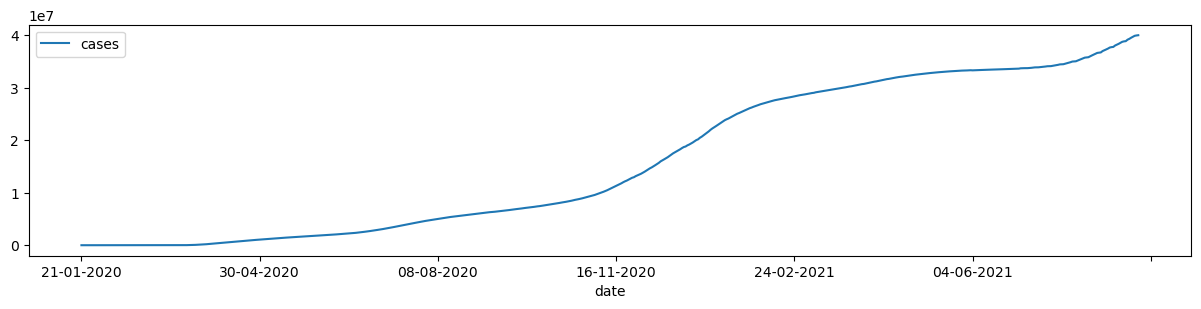

In [15]:
data.plot.line(x = 'date',y = 'cases',figsize=(15,3))
plt.show()

In [16]:
data2=data.set_index("date")
data2.head()

,cases
date,
21-01-2020,1
22-01-2020,1
23-01-2020,1
24-01-2020,2
25-01-2020,3


In [17]:
fit_auto= Holt(data2).fit(optimized=True) # lets software decide 
fit_auto.params

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '21-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '22-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '23-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:557: UserWarning: Parsing '24-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  _index = to_datetime(index)
C:\Users\mahes\anaco

{'smoothing_level': 0.995,
 'smoothing_trend': 0.2605952380952381,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1.0,
 'initial_trend': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [18]:
data2["Forecast"]=fit_auto.fittedvalues
data2.head()

,cases,Forecast
date,,
21-01-2020,1,1.000000
22-01-2020,1,1.000000
23-01-2020,1,1.000000
24-01-2020,2,1.000000
25-01-2020,3,2.254292


#### Accuracy of Model

In [19]:
mean_absolute_percentage_error = np.mean(np.abs(data2.cases - data2.Forecast)/np.abs(data2.cases))*100
mean_absolute_percentage_error

1.4273887908571474

#### Forecast Value & Plot 

In [20]:
Forecast2 = round(fit_auto.forecast(6),0)
Forecast2

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


594    40128396.0
595    40250994.0
596    40373592.0
597    40496190.0
598    40618788.0
599    40741387.0
dtype: float64

<AxesSubplot:xlabel='date'>

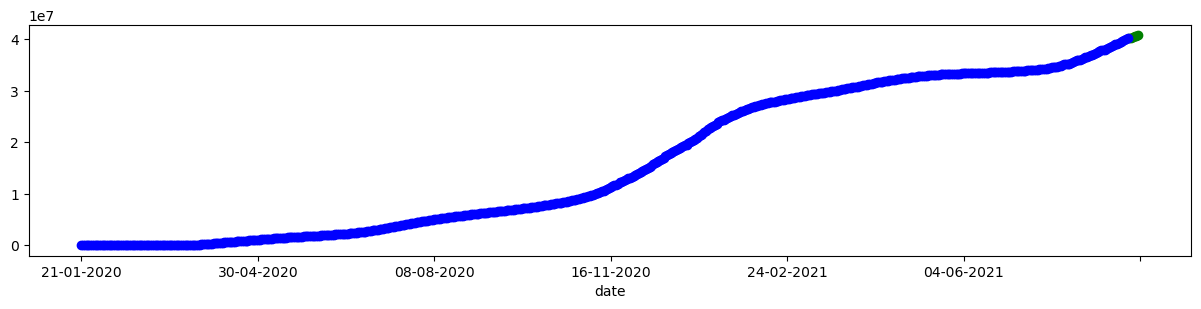

In [21]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

#### Auto model is Best Model 